<a href="https://colab.research.google.com/github/richagupta114/-Bitcoin-Market-Sentiment-and-Trading-Behavior-Analysis-/blob/main/Richa_Kumari_Bitcoin_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# 1. Load datasets
# --------------------------
fear_greed_path = r"fear_greed_index.csv"   # Change to your local path
historical_data_path = r"historical_data.csv"  # Change to your local path

fear_greed_df = pd.read_csv(fear_greed_path)
historical_df = pd.read_csv(historical_data_path)

# Print first few values of 'Timestamp' before conversion
print("First few values of 'Timestamp' in historical_df before conversion:")
print(historical_df['Timestamp'].head())

# 2. Preprocessing
# --------------------------
# Convert date columns to datetime format, coercing errors and inferring format
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], errors='coerce', infer_datetime_format=True)
historical_df['Timestamp'] = pd.to_datetime(historical_df['Timestamp'], unit='ms', errors='coerce')

# Drop rows where 'Timestamp' is NaT
historical_df.dropna(subset=['Timestamp'], inplace=True)

# Extract only date from 'Timestamp' in historical data
historical_df['date'] = historical_df['Timestamp'].dt.date
fear_greed_df['date'] = fear_greed_df['date'].dt.date

# Convert date columns to datetime objects for consistent type
historical_df['date'] = pd.to_datetime(historical_df['date'], errors='coerce')
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], errors='coerce')

First few values of 'Timestamp' in historical_df before conversion:
0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
Name: Timestamp, dtype: float64


/tmp/ipython-input-150981608.py:19: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], errors='coerce', infer_datetime_format=True)


In [24]:
# Print date ranges before merge
print("Date range of historical_df:", historical_df['date'].min(), "to", historical_df['date'].max())
print("Date range of fear_greed_df:", fear_greed_df['date'].min(), "to", fear_greed_df['date'].max())


# Merge datasets on date
merged_df = pd.merge(historical_df, fear_greed_df, on='date', how='inner')

# Check for common dates and the size of merged_df
common_dates = pd.merge(historical_df[['date']], fear_greed_df[['date']], on='date', how='inner').drop_duplicates()
print(f"Number of common dates after preprocessing: {len(common_dates)}")
print(f"Size of merged_df after merge: {len(merged_df)}")


# Convert 'Closed PnL' to numeric
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')

# Drop rows with missing sentiment or Closed PnL
merged_df.dropna(subset=['classification', 'Closed PnL'], inplace=True)

# 3. Analysis: Average PnL by sentiment

pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().sort_values()

print("Average Trader PnL by Sentiment:")
print(pnl_by_sentiment)

Date range of historical_df: 2023-03-28 00:00:00 to 2025-06-15 00:00:00
Date range of fear_greed_df: 2018-01-02 00:00:00 to 2025-12-04 00:00:00
Number of common dates after preprocessing: 2
Size of merged_df after merge: 14103
Average Trader PnL by Sentiment:
classification
Extreme Greed    22.229713
Fear             25.418772
Name: Closed PnL, dtype: float64


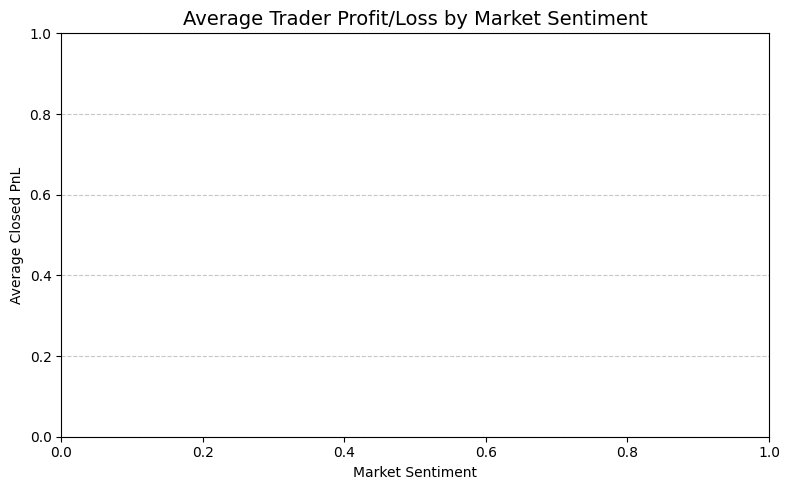

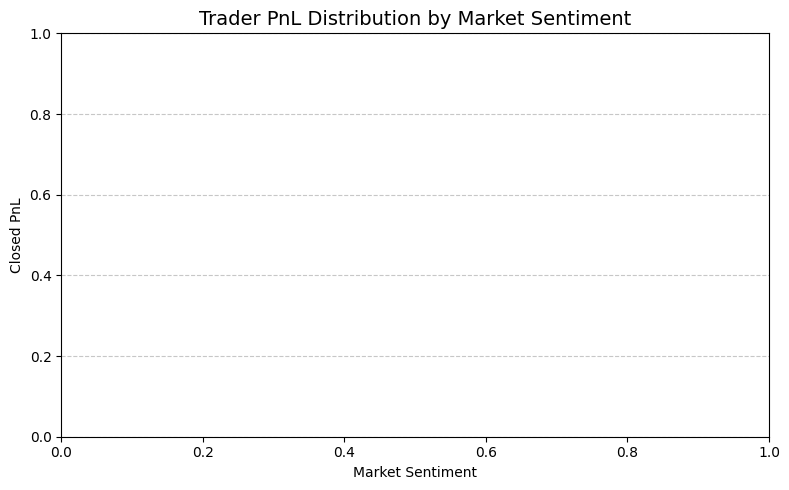

In [11]:
# 4. Visualization: Bar Chart

plt.figure(figsize=(8, 5))
sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette="coolwarm")
plt.title('Average Trader Profit/Loss by Market Sentiment', fontsize=14)
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 5. Optional: Distribution Plot

plt.figure(figsize=(8, 5))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df, palette="coolwarm")
plt.title('Trader PnL Distribution by Market Sentiment', fontsize=14)
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Correlation between Fear & Greed Index value and PnL: nan


/tmp/ipython-input-4022382048.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='value', y='Closed PnL', data=merged_df, hue='classification', palette='coolwarm')


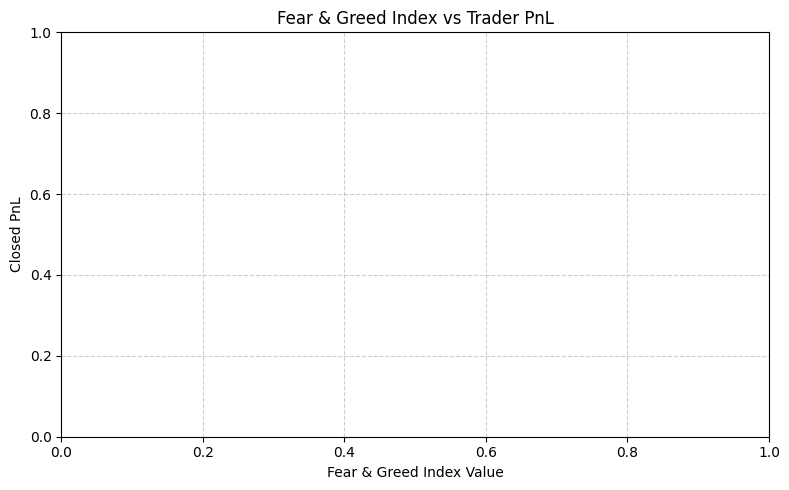

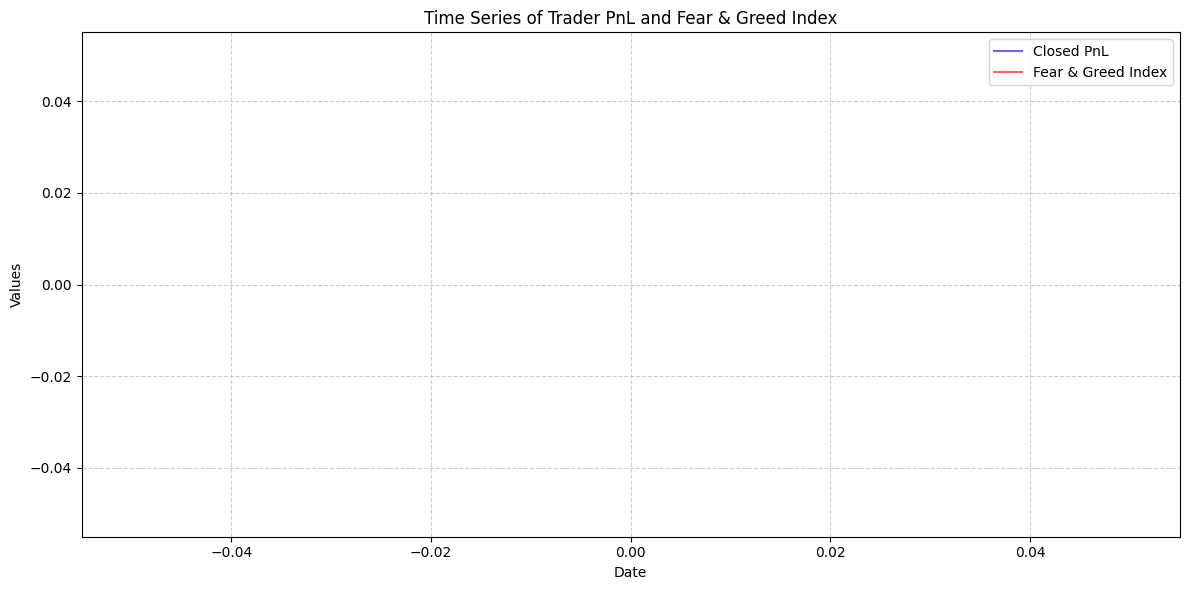

In [12]:

# Part 2: Correlation & Trend Analysis


# Ensure 'value' column in fear_greed_df is numeric
merged_df['value'] = pd.to_numeric(merged_df['value'], errors='coerce')

# 1. Correlation between Fear & Greed Index and Closed PnL
correlation = merged_df['value'].corr(merged_df['Closed PnL'])
print(f"Correlation between Fear & Greed Index value and PnL: {correlation:.2f}")

# 2. Plot correlation scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='value', y='Closed PnL', data=merged_df, hue='classification', palette='coolwarm')
plt.title('Fear & Greed Index vs Trader PnL')
plt.xlabel('Fear & Greed Index Value')
plt.ylabel('Closed PnL')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 3. Time series trend of PnL and Fear & Greed
plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['Closed PnL'], label='Closed PnL', color='blue', alpha=0.6)
plt.plot(merged_df['date'], merged_df['value'], label='Fear & Greed Index', color='red', alpha=0.6)
plt.title('Time Series of Trader PnL and Fear & Greed Index')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


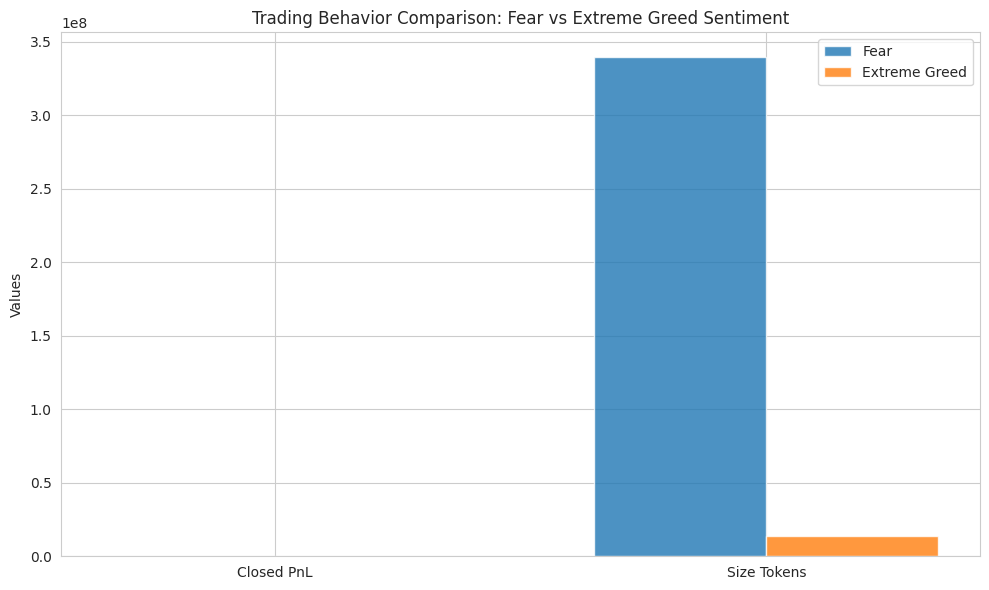

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Use the merged_df which contains sentiment and trading data
# Ensure correct sentiment labeling (Fear vs Greed) - already handled in previous steps with 'classification'

# Aggregate trading behavior by sentiment
sentiment_stats = merged_df.groupby('classification').agg({
    'Closed PnL': 'mean',    # Average profitability (using Closed PnL)
    'Size Tokens': 'sum',     # Total trade volume
}).reset_index()

# Plot grouped bar chart
metrics = ['Closed PnL', 'Size Tokens']
x = range(len(metrics))

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# Filter data for Fear and Extreme Greed sentiments (or Fear and Greed if Extreme Greed is not always present)
fear_values = sentiment_stats.loc[sentiment_stats['classification'] == 'Fear', metrics].values.flatten()
greed_values = sentiment_stats.loc[sentiment_stats['classification'] == 'Extreme Greed', metrics].values.flatten()


ax.bar([i - bar_width/2 for i in x], fear_values, width=bar_width, label='Fear', alpha=0.8)
ax.bar([i + bar_width/2 for i in x], greed_values, width=bar_width, label='Extreme Greed', alpha=0.8)

# Labels & styling
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel("Values")
ax.set_title("Trading Behavior Comparison: Fear vs Extreme Greed Sentiment")
ax.legend()
plt.tight_layout()
plt.show()

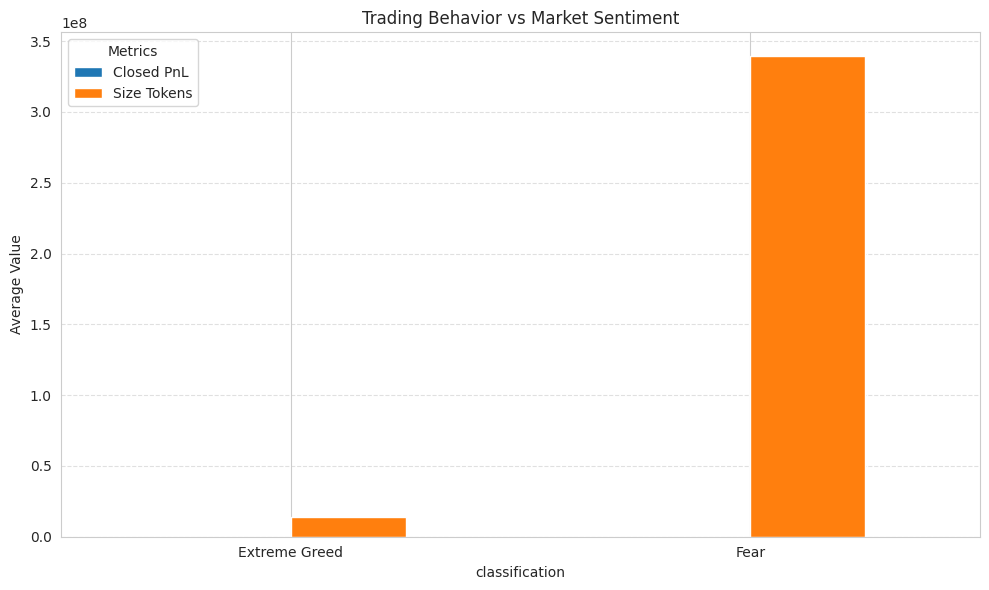

=== Trading Behavior vs Market Sentiment ===
  classification  Closed PnL   Size Tokens
0  Extreme Greed   22.229713  1.404851e+07
1           Fear   25.418772  3.393031e+08


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for better plotting


# Aggregate trading behavior by sentiment
sentiment_analysis = merged_df.groupby('classification').agg({
    'Closed PnL': 'mean',    # Average profitability
    'Size Tokens': 'sum',     # Total trade volume
}).reset_index()

# Plot grouped bar chart
sentiment_analysis.set_index('classification').plot(kind='bar', figsize=(10,6))
plt.title("Trading Behavior vs Market Sentiment")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print table for reference
print("=== Trading Behavior vs Market Sentiment ===")
print(sentiment_analysis)

/tmp/ipython-input-57622456.py:182: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics = df.groupby(['ConsistencyCat', 'SentimentPhase']).apply(calc_metrics).reset_index()



=== Performance metrics by Consistency Category and Sentiment Phase ===

                                 avg_pnl  win_rate  avg_leverage  \
ConsistencyCat SentimentPhase                                      
High           Fear            25.418772  0.490089           NaN   
               Greed           22.229713  0.317182           NaN   

                                   avg_size  trade_count  
ConsistencyCat SentimentPhase                             
High           Fear            48736.443323       6962.0  
               Greed            1967.302964       7141.0  


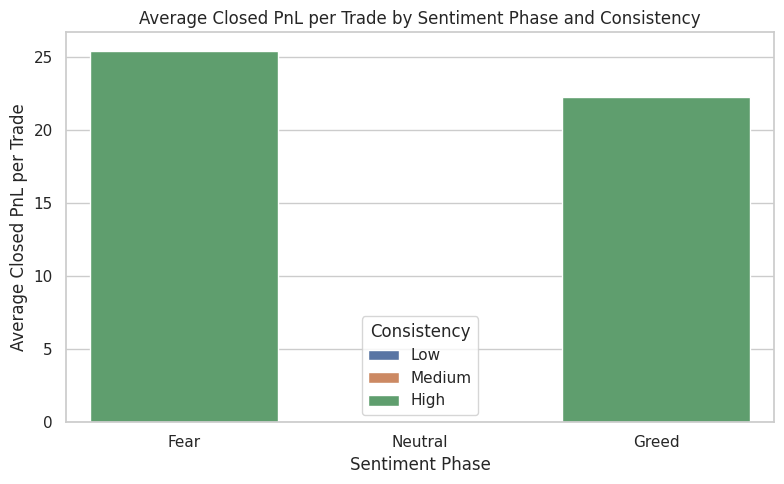

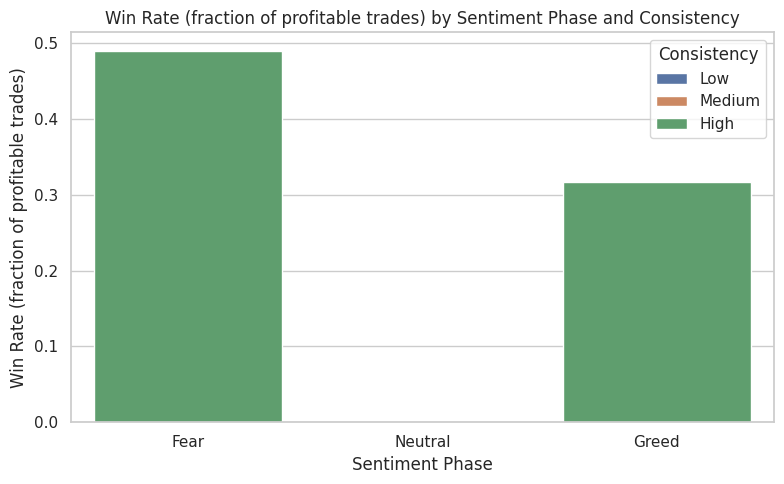

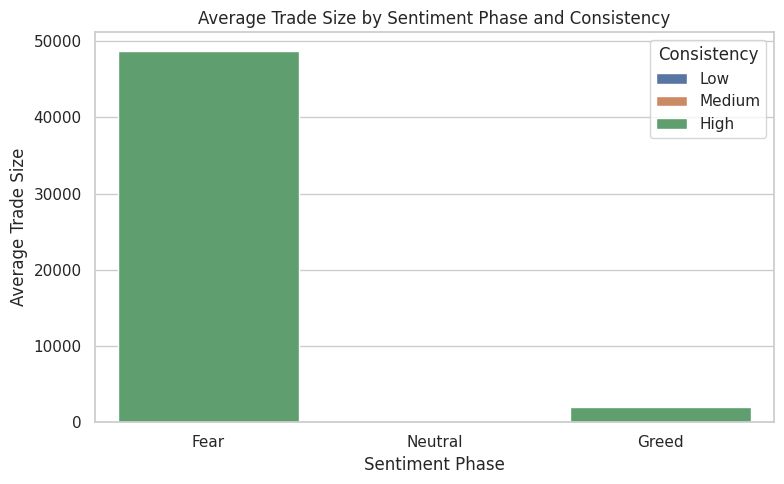

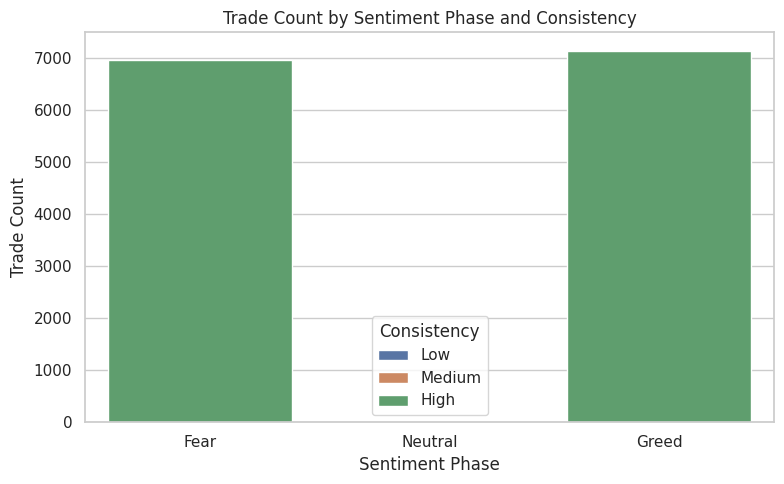


=== Mann-Whitney U Test (High vs Low consistency) on Closed PnL per trade for each Sentiment Phase ===
Fear: Not enough data for robust test (High:6962, Low:0)
Neutral: Not enough data for robust test (High:0, Low:0)
Greed: Not enough data for robust test (High:7141, Low:0)

Top accounts (by total_trades) per Consistency category:

Category = Low
Empty DataFrame
Columns: [Account, consistency_score_median, avg_daily_pnl, total_trades, total_volume]
Index: []

Category = Medium
Empty DataFrame
Columns: [Account, consistency_score_median, avg_daily_pnl, total_trades, total_volume]
Index: []

Category = High
                                      Account  consistency_score_median  \
7  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23                       NaN   
5  0x8477e447846c758f5a675856001ea72298fd9cb5                       NaN   
4  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4                       NaN   
3  0x4f93fead39b70a1824f981a54d4e55b278e9f760                       NaN   
2  0x430f09

In [42]:
# part4_consistency_vs_sentiment.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

sns.set(style="whitegrid")


try:
    merged_df
except NameError:
    raise RuntimeError("Please load `merged_df` (merged trader + sentiment dataframe) before running this script.")

df = merged_df.copy()

# Normalize common column names
if 'Account' not in df.columns and 'account' in df.columns:
    df.rename(columns={'account': 'Account'}, inplace=True)

# Closed PnL variations
if 'Closed PnL' not in df.columns:
    if 'closedPnL' in df.columns:
        df.rename(columns={'closedPnL': 'Closed PnL'}, inplace=True)
    elif 'ClosedPnL' in df.columns:
        df.rename(columns={'ClosedPnL': 'Closed PnL'}, inplace=True)
    else:
        raise RuntimeError("Closed PnL column not found. Expected 'Closed PnL' or 'closedPnL'.")

# Size column
size_col = None
for candidate in ['Size Tokens', 'Size', 'Size_USD', 'SizeUSD', 'SizeTokens']:
    if candidate in df.columns:
        size_col = candidate
        break

# Leverage column (optional)
leverage_col = None
for candidate in ['Leverage', 'leverage']:
    if candidate in df.columns:
        leverage_col = candidate
        break

# Date handling: ensure a date column (datetime.date)
if 'date' not in df.columns:
    # try Timestamp IST or Timestamp or time
    for candidate in ['Timestamp IST', 'Timestamp', 'time']:
        if candidate in df.columns:
            df['date'] = pd.to_datetime(df[candidate], errors='coerce').dt.date
            break
    else:
        raise RuntimeError("No date column found. Add a 'date' column (datetime) to merged_df.")

# Sentiment numeric value: prefer 'value' (0-100). If missing, map classification to phases.
if 'value' not in df.columns:
    # if classification exists with text like 'Fear', 'Extreme Fear', 'Greed', try to map approximate numeric
    if 'classification' in df.columns:
        def class_to_value(s):
            s = str(s).lower()
            if 'extreme fear' in s or 'extreme fear' == s: return 10
            if 'fear' in s: return 25
            if 'neutral' in s: return 50
            if 'greed' in s and 'extreme' not in s: return 75
            if 'extreme greed' in s: return 90
            return np.nan
        df['value'] = df['classification'].apply(class_to_value)
    else:
        raise RuntimeError("No sentiment 'value' or 'classification' column found in merged_df.")

# Convert Closed PnL numeric
df['Closed PnL'] = pd.to_numeric(df['Closed PnL'], errors='coerce').fillna(0.0)

# Create Sentiment Phase from 'value'
# ---------------------------
def value_to_phase(v):
    try:
        v = float(v)
    except Exception:
        return 'Neutral'
    if v <= 33:
        return 'Fear'
    elif v >= 67:
        return 'Greed'
    else:
        return 'Neutral'

df['SentimentPhase'] = df['value'].apply(value_to_phase)

# Compute daily PnL per trader

daily = (
    df.groupby(['Account', 'date'])
      .agg(DailyPnL=('Closed PnL', 'sum'),
           TradeCount=('Closed PnL', 'count'),
           TotalVolume=(size_col, 'sum') if size_col else ('Closed PnL', 'count'))
      .reset_index()
)

# Some accounts may have NaNs in TotalVolume; fill with 0
daily['TotalVolume'] = daily['TotalVolume'].fillna(0)

# Sort for rolling calculations
daily = daily.sort_values(['Account', 'date'])


ROLL_WIN = 14
# compute rolling std per account
daily['rolling_std'] = daily.groupby('Account')['DailyPnL'].transform(lambda x: x.rolling(ROLL_WIN, min_periods=3).std())

# Inverse of rolling std as "Consistency Score" (higher = more consistent)
# Add small epsilon to avoid divide by zero
eps = 1e-8
daily['consistency_score'] = 1 / (daily['rolling_std'].fillna(daily['rolling_std'].median()) + eps)

# Collapse consistency back to account-level by median score
account_consistency = daily.groupby('Account').agg(
    consistency_score_median=('consistency_score', 'median'),
    avg_daily_pnl=('DailyPnL', 'mean'),
    total_trades=('TradeCount', 'sum'),
    total_volume=('TotalVolume', 'sum')
).reset_index()

# Define consistency categories (High / Medium / Low)
q1 = account_consistency['consistency_score_median'].quantile(0.33)
q2 = account_consistency['consistency_score_median'].quantile(0.66)

def consistency_cat(x):
    if x <= q1:
        return 'Low'
    elif x <= q2:
        return 'Medium'
    else:
        return 'High'

account_consistency['ConsistencyCat'] = account_consistency['consistency_score_median'].apply(consistency_cat)

# Merge Consistency info back to trade-level df
# ---------------------------
df = df.merge(account_consistency[['Account', 'consistency_score_median', 'ConsistencyCat']], on='Account', how='left')

# metrics: avg Closed PnL per trade, win rate (pct of trades with Closed PnL>0), avg leverage, avg trade size, trade count
# ---------------------------
def calc_metrics(group):
    avg_pnl = group['Closed PnL'].mean()
    win_rate = (group['Closed PnL'] > 0).mean()
    avg_leverage = np.nan
    if leverage_col:
        avg_leverage = pd.to_numeric(group[leverage_col], errors='coerce').mean()
    avg_size = group[size_col].apply(pd.to_numeric, errors='coerce').mean() if size_col else np.nan
    trade_count = len(group)
    return pd.Series({
        'avg_pnl': avg_pnl,
        'win_rate': win_rate,
        'avg_leverage': avg_leverage,
        'avg_size': avg_size,
        'trade_count': trade_count
    })

metrics = df.groupby(['ConsistencyCat', 'SentimentPhase']).apply(calc_metrics).reset_index()

# Pivot for nicer display
metrics_pivot = metrics.pivot(index='ConsistencyCat', columns='SentimentPhase')

print("\n=== Performance metrics by Consistency Category and Sentiment Phase ===\n")
print(metrics.set_index(['ConsistencyCat', 'SentimentPhase']))


# Visualization: bar plots for each metric across SentimentPhases, grouped by ConsistencyCat
# ---------------------------
metrics_for_plot = metrics.copy()

# Ensure consistent order
consistency_order = ['Low', 'Medium', 'High']
sentiment_order = ['Fear', 'Neutral', 'Greed']

# Plot function
def plot_metric(metric, ylabel, fmt=None):
    plt.figure(figsize=(8,5))
    sns.barplot(
        data=metrics_for_plot,
        x='SentimentPhase', y=metric, hue='ConsistencyCat',
        order=sentiment_order, hue_order=consistency_order
    )
    plt.title(f"{ylabel} by Sentiment Phase and Consistency")
    plt.ylabel(ylabel)
    plt.xlabel("Sentiment Phase")
    plt.legend(title="Consistency")
    plt.tight_layout()
    plt.show()

plot_metric('avg_pnl', 'Average Closed PnL per Trade')
plot_metric('win_rate', 'Win Rate (fraction of profitable trades)')
plot_metric('avg_size', 'Average Trade Size')
if leverage_col:
    plot_metric('avg_leverage', 'Average Leverage')
plot_metric('trade_count', 'Trade Count')


# Statistical comparison: Mann-Whitney U between High vs Low consistency per SentimentPhase for avg_pnl
# ---------------------------
print("\n=== Mann-Whitney U Test (High vs Low consistency) on Closed PnL per trade for each Sentiment Phase ===")
for phase in sentiment_order:
    high_vals = df[(df['ConsistencyCat']=='High') & (df['SentimentPhase']==phase)]['Closed PnL'].values
    low_vals = df[(df['ConsistencyCat']=='Low') & (df['SentimentPhase']==phase)]['Closed PnL'].values
    if len(high_vals) < 10 or len(low_vals) < 10:
        print(f"{phase}: Not enough data for robust test (High:{len(high_vals)}, Low:{len(low_vals)})")
        continue
    stat, p = mannwhitneyu(high_vals, low_vals, alternative='two-sided')
    print(f"{phase}: U={stat:.2f}, p={p:.4f}  -> {'significant' if p<0.05 else 'not significant'}")

# Optional: print top accounts in each ConsistencyCat to inspect behavior
# ---------------------------
print("\nTop accounts (by total_trades) per Consistency category:")
for cat in consistency_order:
    tmp = account_consistency[account_consistency['ConsistencyCat']==cat].sort_values('total_trades', ascending=False).head(5)
    print(f"\nCategory = {cat}")
    print(tmp[['Account','consistency_score_median','avg_daily_pnl','total_trades','total_volume']])
